# EDA nmos_simulated_data

## imports

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and prepare csv data

In [21]:
#READ CSV FILE USING PANDAS
Data_Frame= pd.read_csv('data/simulated_data_nmos.csv')
Data_Frame.head()

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,vth,v_pinch_off,lambda(um),...,gmb(uS),ro(Kohm),cgg(aF),cgs(aF),cgd(aF),cdd(aF),cdb(aF),cgb(aF),csb(aF),corner
0,-0.45,8.0,0.84,0.3,27.0,0.0,0.0,0.402306,-0.45,-0.011819,...,0.197561,3.181189e+06,34032.2445,-28204.1822,-69.122702,88.099279,-4468.20789,-5758.93958,-6638.15046,tt
1,-0.40,8.0,0.84,0.3,27.0,0.0,0.0,0.420865,-0.45,-0.011819,...,0.060563,6.552405e+06,31291.9536,-24561.0933,-64.892149,80.854021,-3789.70803,-6665.96815,-5628.27847,tt
2,-0.35,8.0,0.84,0.3,27.0,0.0,0.0,0.438375,-0.45,-0.011819,...,0.016120,1.321234e+07,28034.5839,-20243.4075,-60.510512,73.904890,-3083.99772,-7730.66594,-4577.23770,tt
3,-0.30,8.0,0.84,0.3,27.0,0.0,0.0,0.454991,-0.45,-0.011819,...,0.003967,3.684764e+07,24469.8762,-15523.2235,-56.971381,68.328120,-2370.67659,-8889.68129,-3514.23439,tt
4,-0.25,8.0,0.84,0.3,27.0,0.0,0.0,0.470835,-0.45,-0.011819,...,0.000886,1.229205e+08,20989.5482,-10919.3492,-55.582426,65.518741,-1701.53123,-10014.61660,-2516.57348,tt


In [22]:
#SELECT ONLY NEEDED COLUMNS
# * vds (Continuous Value)
# * L(um) (Continuous Value)
# * W(um) (Continuous Value)
# * drain_length(um) (Continuous Value)
# * temperature (Continuous Value)
# * vgs (Continuous Value)
# * vsb (Continuous Value)
# * corner (Categorical Value)
# * id(uA) (Continuous value)
Data_Frame=Data_Frame[['vds','L(um)','W(um)','drain_length(um)','temperature','vgs','vsb','corner','id(uA)']]
Data_Frame.head()

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,corner,id(uA)
0,-0.45,8.0,0.84,0.3,27.0,0.0,0.0,tt,0.034866
1,-0.40,8.0,0.84,0.3,27.0,0.0,0.0,tt,0.009451
2,-0.35,8.0,0.84,0.3,27.0,0.0,0.0,tt,0.002331
3,-0.30,8.0,0.84,0.3,27.0,0.0,0.0,tt,0.000532
4,-0.25,8.0,0.84,0.3,27.0,0.0,0.0,tt,0.000111


In [23]:
Data_Frame.describe()

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,id(uA)
count,871488.000000,871488.000000,871488.000000,8.714880e+05,871488.0,871488.000000,871488.000000,871488.000000
mean,1.000138,0.329525,3.664366,3.000000e-01,27.0,0.895708,0.745869,339.674855
std,0.880264,0.431887,6.682675,4.996006e-16,0.0,0.535547,0.513941,1229.868653
min,-0.500000,0.150000,0.360000,3.000000e-01,27.0,0.000000,0.000000,0.000000
25%,0.250000,0.150000,0.650000,3.000000e-01,27.0,0.450000,0.300000,0.000836
50%,1.000000,0.150000,0.940000,3.000000e-01,27.0,0.900000,0.600000,12.420166
75%,1.750000,0.500000,1.000000,3.000000e-01,27.0,1.350000,1.200000,122.021384
max,2.500000,8.000000,25.000000,3.000000e-01,27.0,1.800000,1.500000,14979.728300


In [24]:
#COUNT AND DTYPES
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871488 entries, 0 to 871487
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vds               871488 non-null  float64
 1   L(um)             871488 non-null  float64
 2   W(um)             871488 non-null  float64
 3   drain_length(um)  871488 non-null  float64
 4   temperature       871488 non-null  float64
 5   vgs               871488 non-null  float64
 6   vsb               871488 non-null  float64
 7   corner            871488 non-null  object 
 8   id(uA)            871488 non-null  float64
dtypes: float64(8), object(1)
memory usage: 59.8+ MB


In [25]:
Data_Frame['corner'].unique()

array(['tt', 'ss', 'sf', 'fs', 'ff'], dtype=object)

In [26]:
# convert corner to numerical value
Data_Frame['corner'].replace(['tt', 'ss', 'sf', 'fs', 'ff'],
                        [0, 1,2,3,4], inplace=True)
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871488 entries, 0 to 871487
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vds               871488 non-null  float64
 1   L(um)             871488 non-null  float64
 2   W(um)             871488 non-null  float64
 3   drain_length(um)  871488 non-null  float64
 4   temperature       871488 non-null  float64
 5   vgs               871488 non-null  float64
 6   vsb               871488 non-null  float64
 7   corner            871488 non-null  int64  
 8   id(uA)            871488 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 59.8 MB


In [27]:
#check for null values
Data_Frame.isnull().sum()

vds                 0
L(um)               0
W(um)               0
drain_length(um)    0
temperature         0
vgs                 0
vsb                 0
corner              0
id(uA)              0
dtype: int64

In [28]:
#UNIQUE VALUES
Data_Frame.nunique()

vds                     61
L(um)                    3
W(um)                    7
drain_length(um)         1
temperature              1
vgs                     37
vsb                      6
corner                   5
id(uA)              854959
dtype: int64

In [29]:
Data_Frame['corner'].value_counts()

3    177067
0    177006
2    176884
4    176823
1    163708
Name: corner, dtype: int64

In [30]:
#dropping drain_length and temoerature
Data_Frame=Data_Frame.drop(['drain_length(um)','temperature'],axis=1)

## EDA

In [31]:
#Line plot of the data
Data_Frame.corr().style.background_gradient(cmap='coolwarm')

,vds,L(um),W(um),vgs,vsb,corner,id(uA)
vds,1.000000,0.000346,0.000021,-0.000262,-0.000227,-0.000002,0.027784
L(um),0.000346,1.000000,-0.115479,-0.073811,-0.070334,0.003290,-0.091436
W(um),0.000021,-0.115479,1.000000,-0.008281,-0.008685,-0.004101,0.556950
vgs,-0.000262,-0.073811,-0.008281,1.000000,0.011631,0.000687,0.294993
vsb,-0.000227,-0.070334,-0.008685,0.011631,1.000000,0.000732,-0.026350
corner,-0.000002,0.003290,-0.004101,0.000687,0.000732,1.000000,0.013351
id(uA),0.027784,-0.091436,0.556950,0.294993,-0.026350,0.013351,1.000000


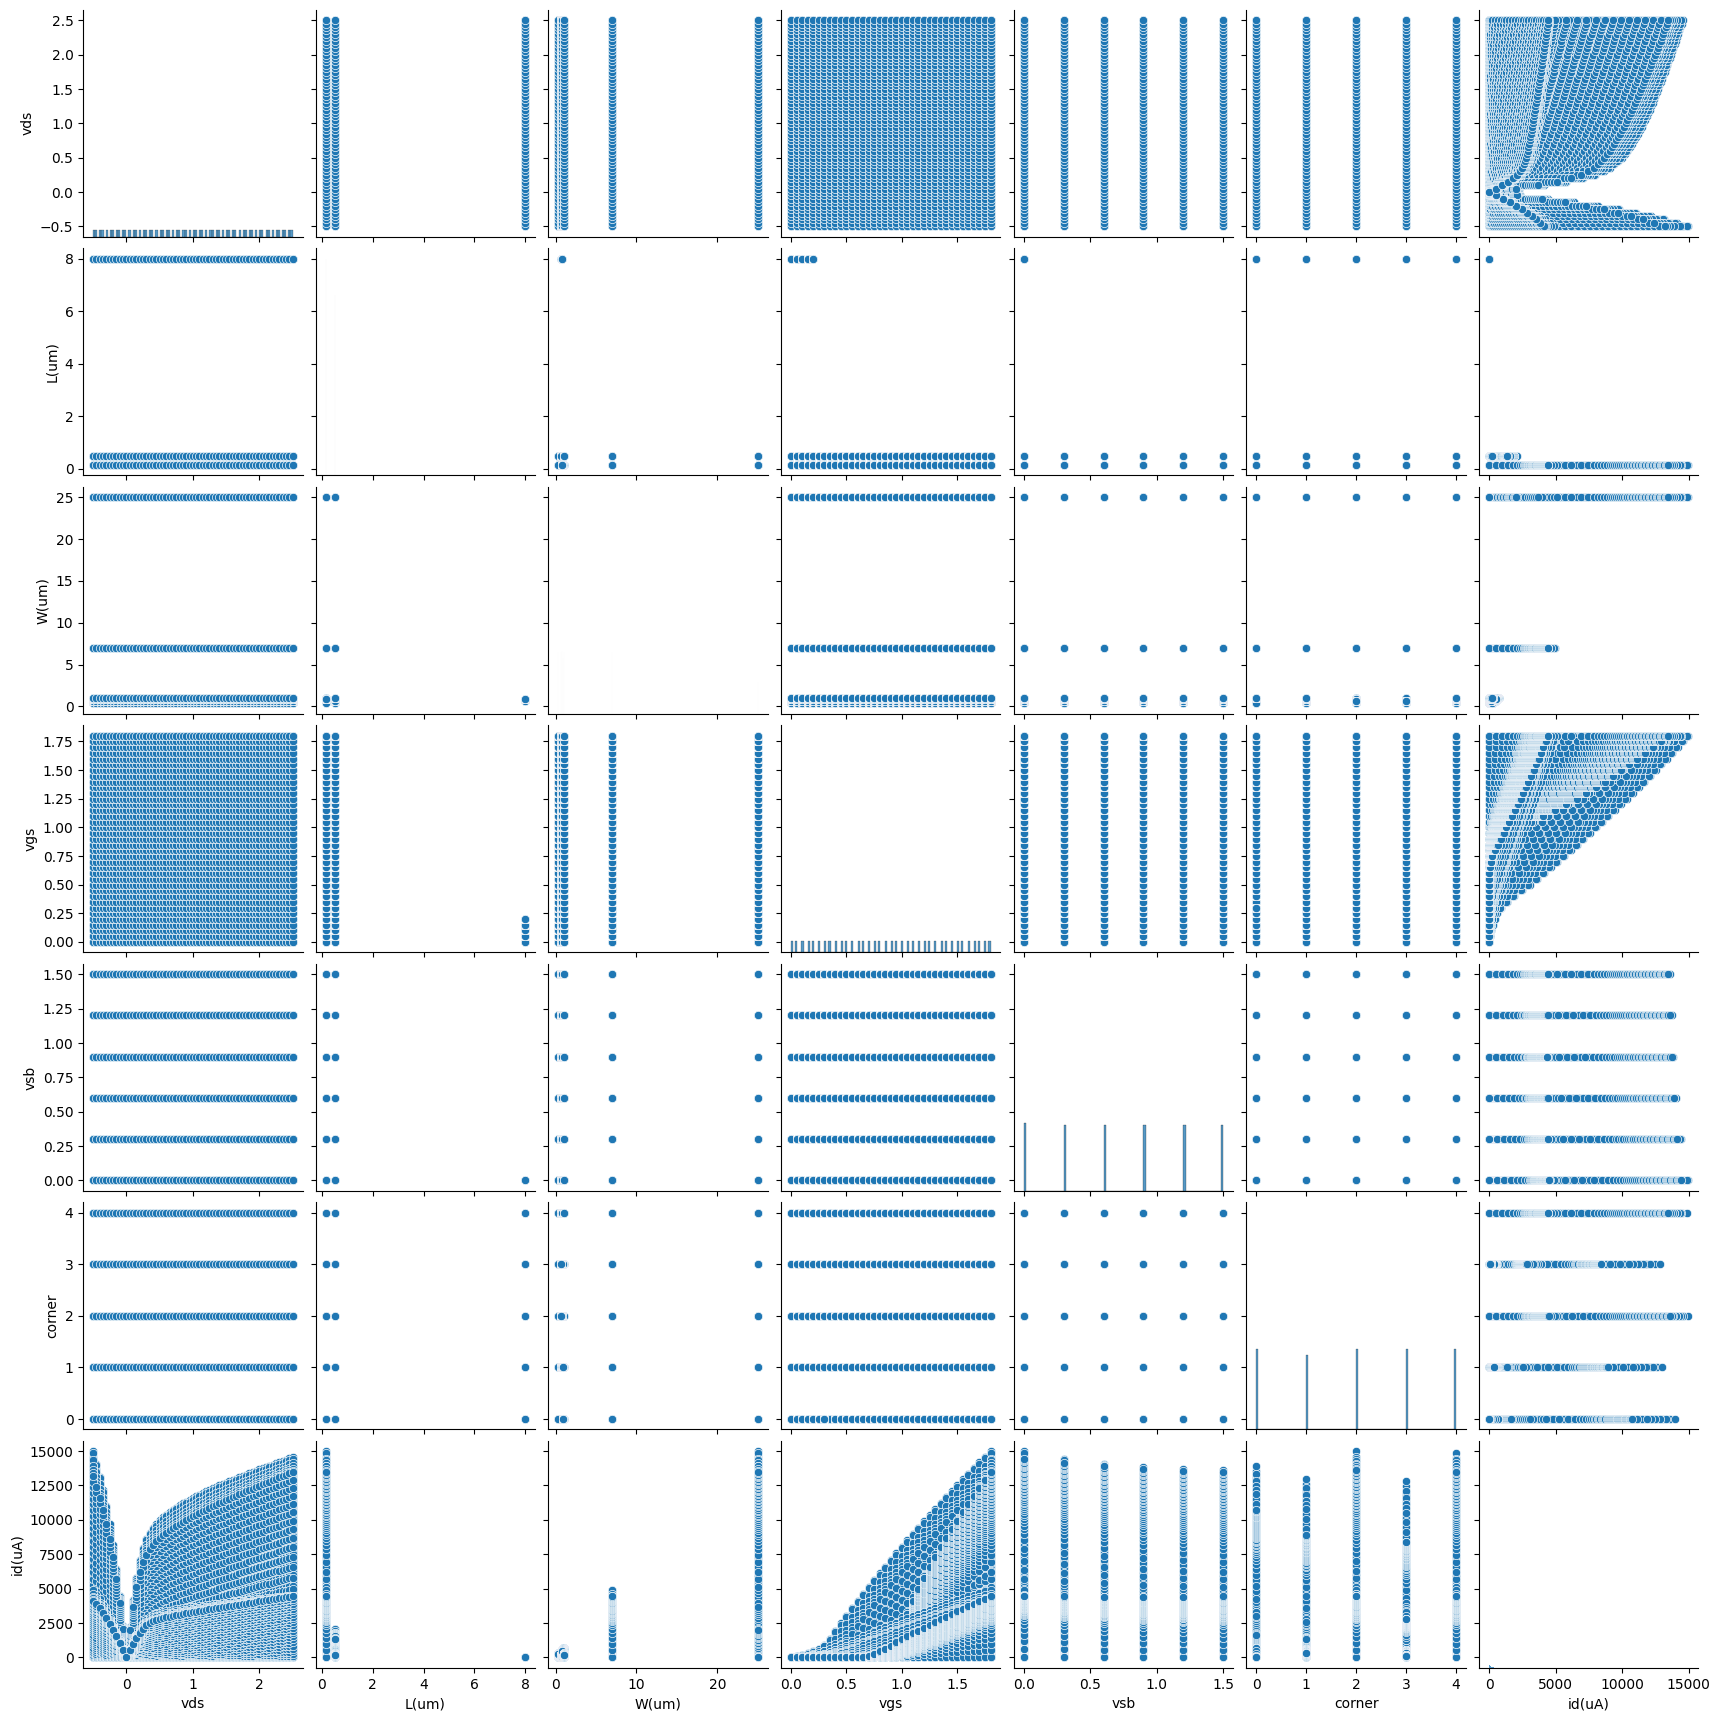

In [13]:
import seaborn as sns
sns.pairplot(Data_Frame)

## splitting data

In [32]:
test=Data_Frame.sample(frac=0.1,random_state=200)
train=Data_Frame.drop(test.index)

In [34]:
train.describe()

,vds,L(um),W(um),vgs,vsb,corner,id(uA)
count,784339.000000,784339.000000,784339.000000,784339.000000,784339.000000,784339.000000,784339.000000
mean,1.000780,0.329378,3.667636,0.895846,0.746008,2.014584,340.949406
std,0.880362,0.431001,6.685329,0.535431,0.513895,1.419548,1233.773981
min,-0.500000,0.150000,0.360000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.150000,0.650000,0.450000,0.300000,1.000000,0.000842
50%,1.000000,0.150000,0.940000,0.900000,0.600000,2.000000,12.462959
75%,1.750000,0.500000,1.000000,1.350000,1.200000,3.000000,122.192505
max,2.500000,8.000000,25.000000,1.800000,1.500000,4.000000,14870.121500


## Normalizing data

In [35]:
train.columns.values[:-1]

array(['vds', 'L(um)', 'W(um)', 'vgs', 'vsb', 'corner'], dtype=object)

In [36]:
for col in train.columns[:-1]:   
    train[col] = (train[col]-train[col].min())/(train[col].max() - train[col].min())

In [37]:
def norm(x):
    return np.log10(x+10)
train['id(uA)'].replace({0.0:1e-13}, inplace=True)
train['id(uA)']=train['id(uA)'].apply(norm)


In [38]:
train.describe()

,vds,L(um),W(um),vgs,vsb,corner,id(uA)
count,784339.000000,784339.000000,784339.000000,784339.000000,784339.000000,784339.000000,784339.000000
mean,0.500260,0.022851,0.134238,0.497692,0.497339,0.503646,1.642535
std,0.293454,0.054905,0.271320,0.297462,0.342597,0.354887,0.754614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.250000,0.000000,0.011769,0.250000,0.200000,0.250000,1.000037
50%,0.500000,0.000000,0.023539,0.500000,0.400000,0.500000,1.351467
75%,0.750000,0.044586,0.025974,0.750000,0.800000,0.750000,2.121207
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.172606


In [39]:
val=train.sample(frac=0.1,random_state=200)

In [40]:
val.describe()

,vds,L(um),W(um),vgs,vsb,corner,id(uA)
count,78434.000000,78434.000000,78434.000000,78434.000000,78434.000000,78434.000000,78434.000000
mean,0.500824,0.022902,0.133175,0.498156,0.498228,0.505495,1.643147
std,0.293782,0.055926,0.269851,0.297731,0.342432,0.354930,0.754035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.250000,0.000000,0.011769,0.250000,0.200000,0.250000,1.000039
50%,0.500000,0.000000,0.023539,0.500000,0.400000,0.500000,1.352995
75%,0.750000,0.044586,0.025974,0.750000,0.800000,0.750000,2.122101
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.159777


## Save modified dataset

In [41]:
train.to_csv('data/train_data.csv',index=False)
test.to_csv('data/test_data.csv',index=False)
val.to_csv('data/val_data.csv',index=False)